In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [21]:
train=pd.read_csv("TrainData.csv")
test=pd.read_csv("TestData.csv")
test1=test.copy()
train.head(15)

,CAX_ID,Dependent,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,Company2,1,USA,No,Few,Yes,5,0,2,0,...,9.000000,Yes,No,No,2,Product,No,Management,Medium,Yes
1,Company3,1,USA,No,Few,No,15,0,3,0,...,7.344444,No,No,No,1,Both,Yes,Science,Medium,Yes
2,Company5,1,USA,No,Few,No,7,0,1,1,...,9.822222,No,No,No,0,Product,No,Technology,Medium,Yes
3,Company6,1,USA,No,Few,No,2,0,4,0,...,9.322222,No,No,No,0,Service,No,Science,Medium,Yes
4,Company8,1,USA,No,Few,No,0,0,3,4,...,6.400000,No,No,No,2,Both,No,Management,Medium,No
5,Company9,1,USA,No,Few,No,13,0,2,0,...,12.000000,Yes,No,No,0,Product,No,Management,Medium,Yes
6,Company11,1,USA,No,Few,No,0,0,2,1,...,2.666667,No,No,No,0,Both,No,Science,Medium,Yes
7,Company13,1,USA,No,Few,No,0,0,0,1,...,6.000000,No,No,No,0,Product,No,Science,Medium,Yes
8,Company14,1,USA,No,Few,No,0,0,3,0,...,7.333333,No,No,No,0,Product,Yes,Science,Medium,No
9,Company15,0,USA,No,Few,No,0,2,2,0,...,48.000000,No,No,No,2,Product,No,Management,Medium,Yes


In [22]:
c=train.columns

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 51 columns):
CAX_ID                                      234 non-null object
Dependent                                   234 non-null int64
Company_Location                            234 non-null object
Company_raising_fund                        234 non-null object
Company_Industry_count                      234 non-null object
Company_mobile_app                          234 non-null object
Company_investor_count_seed                 234 non-null int64
Company_investor_count_Angel_VC             234 non-null int64
Company_cofounders_count                    234 non-null int64
Company_advisors_count                      234 non-null int64
Company_senior_team_count                   234 non-null int64
Company_top_Angel_VC_funding                234 non-null object
Company_repeat_investors_count              234 non-null int64
Founders_top_company_experience             234 non-null object
Founde

There is no null value in train data 

In [24]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 51 columns):
CAX_ID                                      80 non-null object
Dependent                                   0 non-null float64
Company_Location                            80 non-null object
Company_raising_fund                        80 non-null object
Company_Industry_count                      80 non-null object
Company_mobile_app                          80 non-null object
Company_investor_count_seed                 80 non-null int64
Company_investor_count_Angel_VC             80 non-null int64
Company_cofounders_count                    80 non-null int64
Company_advisors_count                      80 non-null int64
Company_senior_team_count                   80 non-null int64
Company_top_Angel_VC_funding                80 non-null object
Company_repeat_investors_count              80 non-null int64
Founders_top_company_experience             80 non-null object
Founders_previous_com

There is no null value in test data 

## Data Visualization


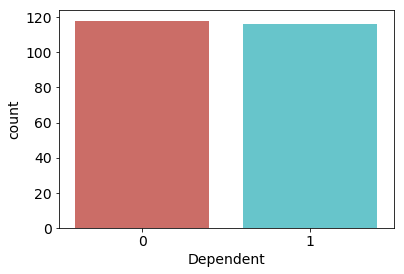

In [25]:
sns.countplot(x='Dependent',data=train,palette='hls',color=["yellow","blue"])
plt.savefig('count_plot')
plt.show()

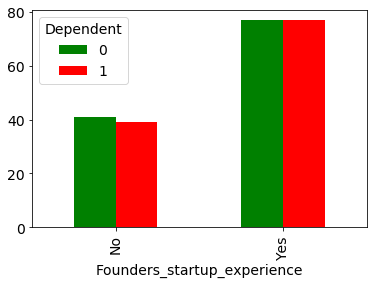

In [26]:
pd.crosstab(train.Founders_startup_experience,train.Dependent).plot(kind='bar',color=["green","red"])
plt.show()

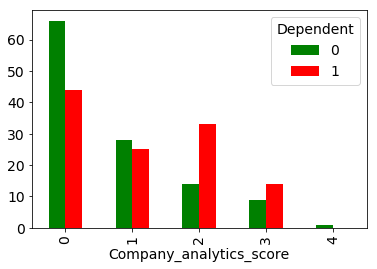

In [33]:
pd.crosstab(train.Company_analytics_score,train.Dependent).plot(kind='bar',color=["green","red"])
plt.show()

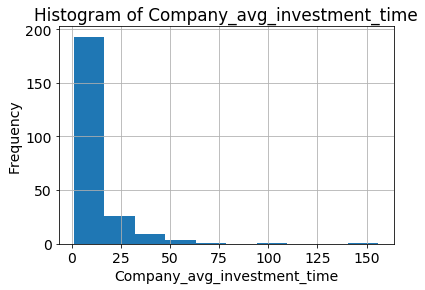

In [34]:
train.Company_avg_investment_time.hist()
plt.title('Histogram of Company_avg_investment_time')
plt.xlabel('Company_avg_investment_time')
plt.ylabel('Frequency')
plt.savefig('hist_age')

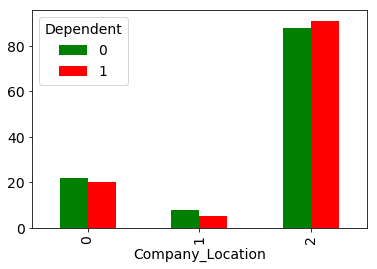

In [35]:
pd.crosstab(train.Company_Location,train.Dependent).plot(kind='bar',color=["green","red"])
plt.show()

## Data Engneering

In [30]:
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [31]:
cate_col=['CAX_ID', 'Company_Location', 'Company_raising_fund',
       'Company_Industry_count', 'Company_mobile_app', 'Company_top_Angel_VC_funding', 'Founders_top_company_experience',
       'Founders_previous_company_employee_count',
       'Founders_startup_experience', 'Founders_big_5_experience',
       'Company_business_model', 'Founders_experience',
       'Founders_global_exposure', 'Founders_Industry_exposure',
       'Founder_education', 
       'Founders_profile_similarity', 'Founders_publications',
       'Company_incubation_investor', 
       'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data', 'Company_Product_or_service',
       'Company_subscription_offering', 'Founder_highest_degree_type',
       'Company_difficulty_obtaining_workforce', 'Company_Founder_Patent']

In [32]:
for i in cate_col:
    train[i]=lbl.fit_transform(train[i])
for i in cate_col:
    test[i]=lbl.fit_transform(test[i])


In [16]:
features=['Company_Location', 'Company_raising_fund',
       'Company_Industry_count', 'Company_mobile_app',
       'Company_investor_count_seed', 'Company_investor_count_Angel_VC',
       'Company_cofounders_count', 'Company_advisors_count',
       'Company_senior_team_count', 'Company_top_Angel_VC_funding',
       'Company_repeat_investors_count', 'Founders_top_company_experience',
       'Founders_previous_company_employee_count',
       'Founders_startup_experience', 'Founders_big_5_experience',
       'Company_business_model', 'Founders_experience',
       'Founders_global_exposure', 'Founders_Industry_exposure',
       'Founder_education', 'Founder_university_quality',
       'Founders_Popularity', 'Founders_fortune1000_company_score',
       'Founders_profile_similarity', 'Founders_publications',
       'Founders_skills_score', 'Founders_Entrepreneurship_skills_score',
       'Founders_Operations_skills_score', 'Founders_Engineering_skills_score',
       'Founders_Marketing_skills_score', 'Founders_Leadership_skills_score',
       'Founders_Data_Science_skills_score',
       'Founders_Business_Strategy_skills_score',
       'Founders_Product_Management_skills_score',
       'Founders_Sales_skills_score', 'Founders_Domain_skills_score',
       'Company_incubation_investor', 'Company_competitor_count',
       'Company_1st_investment_time', 'Company_avg_investment_time',
       'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data',
       'Company_analytics_score', 'Company_Product_or_service',
       'Company_subscription_offering', 'Founder_highest_degree_type',
       'Company_difficulty_obtaining_workforce', 'Company_Founder_Patent']

In [17]:
new_train=train[features]
new_test=test[features]

In [18]:
X=new_train
Y=train[["Dependent"]]
test=new_test

### Features Selection

In [19]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state = 654487)
#apply SelectKBest class to extract top 15 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
feature_selected=(featureScores.nlargest(15,'Score'))  #print 15 best features
feature_selected

,Specs,Score
28,Founders_Engineering_skills_score,104.385239
38,Company_1st_investment_time,90.883253
35,Founders_Domain_skills_score,61.748685
29,Founders_Marketing_skills_score,46.989996
39,Company_avg_investment_time,33.885853
8,Company_senior_team_count,30.565474
31,Founders_Data_Science_skills_score,28.395187
7,Company_advisors_count,27.860944
37,Company_competitor_count,18.325149
25,Founders_skills_score,15.188667


THese 15 are importaant for prediction 

In [1]:
imp_features=np.array(feature_selected.Specs)

NameError: name 'np' is not defined

In [70]:
X1 = X[imp_features]
Y1 = Y

### Logistic Regression
Using top 15 important features

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X1, Y, test_size=0.33, random_state = 245)
LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.76


C:\Users\WIN10\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Evaluation of model
Using ROC curve

Train/Test split results:
LogisticRegression accuracy is 0.756
LogisticRegression log_loss is 0.649
LogisticRegression auc is 0.752


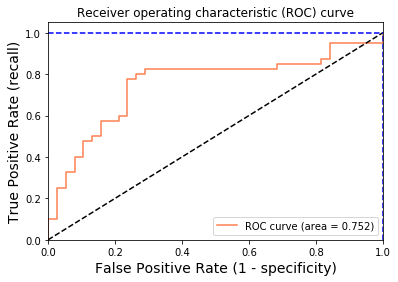

In [72]:
y_pred_proba = LR.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(LR.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(LR.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(LR.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [73]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29  9]
 [10 30]]


The result is telling us that we have 29+30 correct predictions and 10+9 incorrect predictions.


In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75        38
           1       0.77      0.75      0.76        40

    accuracy                           0.76        78
   macro avg       0.76      0.76      0.76        78
weighted avg       0.76      0.76      0.76        78



Interpretation: Of the entire test set, 76%  of a start-up comapnies is succesful.

### Now use this model for prediction of test data 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(new_train[imp_features], Y, test_size=0.33, random_state = 245)
LR = LogisticRegression(solver = 'liblinear')
LR.fit(X_train, y_train)
y_pred = LR.predict(new_test[imp_features])

C:\Users\Akash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
prob=LR.predict_proba(new_test[imp_features])
prob

NameError: name 'LR' is not defined

In [1]:
prob[0,:]


NameError: name 'prob' is not defined

 he array tells us that the model predicts for Company1  a chance of 59.58% percent that the sample belongs to the failure class, and a 40.41%  percent chance that the sample is  from class success 

In [26]:
submission=pd.DataFrame(test1["CAX_ID"])
submission["Dependent"]=y_pred
submission                         

,CAX_ID,Dependent
0,Company1,0
1,Company4,0
2,Company7,1
3,Company10,0
4,Company12,1
...,...,...
75,Company312,0
76,Company288,0
77,Company293,0
78,Company300,0


In [27]:
submission.to_csv("submission.csv", index=False)
print(submission.shape)

(80, 2)
